## Regression Analysis |

# Introduction to Regression with Neural Networks in Tensorflow

Regression model is predicting a numerical variable based on some other combination of variables, or in short, predicting a number.

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.2


# Creating some data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


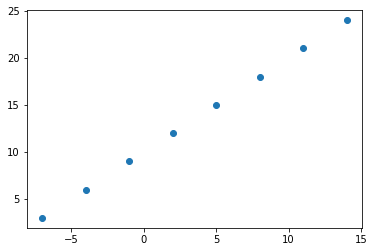

In [ ]:
# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Labels
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X, Y)

In [ ]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
## Turn numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(Y)
X.ndim,y.ndim

(1, 1)

### Steps in creating a model

+ Define and input and output layers
+ Define hidden layers
+ Compile a model
+ Optimizer
+ Evaluation metrics
+ Fitting a model


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 690ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try to make a prediction using a model

y_pred =  model.predict([17.0])
y_pred+11

1/1 [==============================] - 0s 140ms/step


array([[23.71602]], dtype=float32)

### Improving the model

We can improve the model  by altering the steps we used while creating a model.

+ **Creating a model**

Here we might add more layers, increase the number of neurons, change activation function of each layer

+ **Compiling a model**

Here we might change the optimization function or perhaps **learning rate** of the optimization funxtion

+ **Fiting a  model** 

More epochs(leave it trainig for longer) and give model more examples to learn from.

In [ ]:
# Rebuild the model

In [ ]:
# 1.  Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 942ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [ ]:
# The Data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Check model prediction
model.predict([17.0])

1/1 [==============================] - 0s 208ms/step


array([[29.739855]], dtype=float32)

## Rewriting the model


In [ ]:
# 1.  Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    # tf.keras.layers.Dense(100, activation='relu')
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.5),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=100)



/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 858ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 8.3236 - mae: 8.3236
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 6.7993 - mae: 6.7993
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 7.0660 - mae: 7.0660
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 6.8921 - mae: 6.8921
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 6.2068 - mae: 6.2068
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 5.4141 - mae: 5.4141
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 5.1556 - mae: 5.1556
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 4.8932 - mae: 4.8932
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 4.3772 - mae: 4.3772
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - l

In [ ]:
# Predicting the model
model.predict([17.0])

1/1 [==============================] - 0s 195ms/step


array([[27.330833]], dtype=float32)

## Trying different methods to improve the model



In [ ]:
# Create a model with different number of layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.4800 - mae: 13.4800
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.9217 - mae: 12.9217
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 12.3612 - mae: 12.3612
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 11.7937 - mae: 11.7937
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 11.2106 - mae: 11.2106
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6209 - mae: 10.6209
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 10.0058 - mae: 10.0058
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3625 - mae: 9.3625
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6887 - mae: 8.6887
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
# Prediction test
model.predict([17.0])

1/1 [==============================] - 0s 157ms/step


array([[31.727648]], dtype=float32)

### Evaluating a model

Build - Fit - Evaluate - Tweak - Repeat🔁

### For evaluation ->
Visualize : 
+ How data looks like.
+ What the model looks like.
+ Training a model.
+ Predicting a model.

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X+10
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
import matplotlib.pyplot as plt

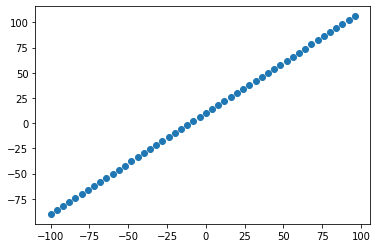

In [ ]:
plt.scatter(X,Y)

### The 3 set rule ...
+ Training set - Model trains on this data, which is typically the 80% of the data avalabale,
+ Validation set - the model  get s turned on this data, which is typically 10-15% of the data
+ Test set - the model gets evaluated on this data, mostly 10-15% of data is avalable.


In [ ]:
# Split data into train and test sets

X_train = X[:40]
X_test = X[40:]

Y_train = Y[:40]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

#### Visualizing Data

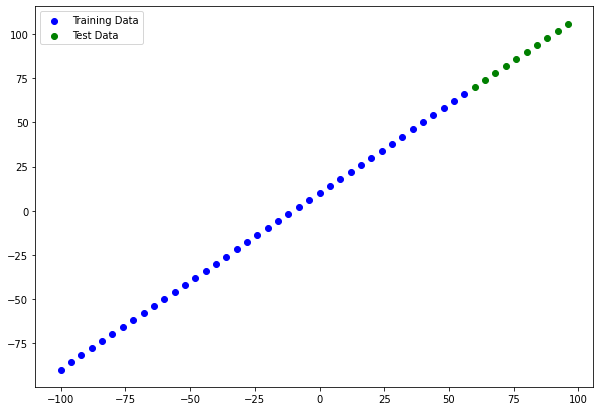

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data
plt.scatter(X_train, Y_train, c="b", label="Training Data")

# Plotting the test data
plt.scatter(X_test, Y_test, c="g", label="Test Data")

# Show a legend
plt.legend();

In [ ]:
# Lets take a look on how to build a neural netwokrk for our data

model  =tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(X_train,Y_train, epochs=100)

In [ ]:

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lets create a model  that build automatically be defining the input_shape argument in the first layer

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Total params is the total number of parameters in the model.

Tainiable params - Parameters the model can update as it trains

Non-trainable params: These params ain't updated during the training (typical  when other patterns are bringed from the trained models during **transfer learning**)

In [ ]:

model.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 42.5345 - mae: 42.5345
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 39.1160 - mae: 39.1160
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 35.5600 - mae: 35.5600
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 32.2152 - mae: 32.2152
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 29.0249 - mae: 29.0249
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 26.1898 - mae: 26.1898
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 23.5915 - mae: 23.5915
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 20.9329 - mae: 20.9329
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.2865 - mae: 18.2865
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 16.2482 - mae: 16.2482
Epoch 11/100
2/2 [==============================] - 0s 6ms/

### Visualizing Layers

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


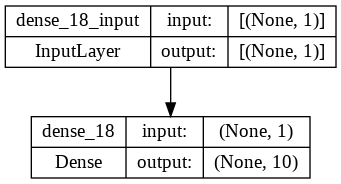

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
X_train = X[:40]
X_test = X[40:]

Y_train = Y[:40]
Y_test = Y[40:]

In [ ]:

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="InputLayer"),
    tf.keras.layers.Dense(1,name="Output_Layer")
],name="My_Model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:

model.fit(X_train, Y_train,epochs=50, verbose=0)

In [ ]:

model.summary()

Model: "My_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


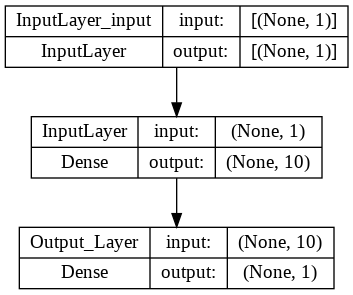

In [ ]:

plot_model(model, show_shapes=True)

So far we have seen about visualizing Layers

### Visualizing Predictions

TO visualize predictions, it is a good idea to pplt them against the good truth table

Often you'll see this in thr form of `y_test` or `y_true` versus `y_pred`

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[ 65.71927 ],
       [ 70.04272 ],
       [ 74.366165],
       [ 78.68961 ],
       [ 83.01306 ],
       [ 87.33651 ],
       [ 91.659966],
       [ 95.983406],
       [100.30686 ],
       [104.63031 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting functions so that we can use it when needed

def plot_pred(train_data=X_train,
              train_labels=Y_train, 
              test_data=X_test,
              test_label=Y_test, 
              predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c="b", label="Training Data")
  plt.scatter(test_data, test_label,c="g", label="Test Data")
  plt.scatter(test_data,predictions,c="r", label="Predictions")
  plt.legend();


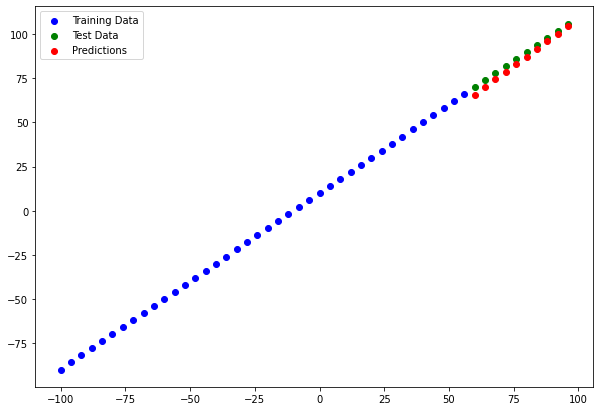

In [ ]:
plot_pred();

Evaluating model predictions with regression evaluation metrics

Different evaluating metrice to evaluate model's performance

+ **MAE** : Mean Absolute Error, on a average, how wrong is each of the model prediction

+ **MSE** : Mean Square Error, Sqare the average errors

In [ ]:
# Evaluate the model on test set
model.evaluate(X_test, tf.constant(Y_test))

1/1 [==============================] - 0s 114ms/step - loss: 2.8252 - mae: 2.8252


[2.8252105712890625, 2.8252105712890625]

In [ ]:
y_pred, Y_test

(array([[ 65.71927 ],
        [ 70.04272 ],
        [ 74.366165],
        [ 78.68961 ],
        [ 83.01306 ],
        [ 87.33651 ],
        [ 91.659966],
        [ 95.983406],
        [100.30686 ],
        [104.63031 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Calculating mean absolute error

mae = tf.metrics.mean_absolute_error(Y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.825212>

In [ ]:
# Calculate mean square error
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=8.844933>

In [ ]:
hub = tf.keras.losses.huber(Y_test, tf.squeeze(y_pred))
hub

<tf.Tensor: shape=(), dtype=float32, numpy=2.325212>

In [ ]:
# Make some function to reuse mse and mae
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(Y_test, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(Y_test, tf.squeeze(y_pred))

### Running experiments to improve a model

Build - Fit - Evaluate - Tweak - Repeat

1. Get more data(more opportunites to learn from data)
2. Make your model larger(using more complex model, layers, hidden units, epoch)

### 3 Modelling Experiments

1. `model 1` : 1 Layer - 100 Epochs
2. `model 2` : 2 layers - 100 EPochs
3. `model 3` : 2 layers - 500 epochs

In [ ]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train,Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

1/1 [==============================] - 0s 42ms/step


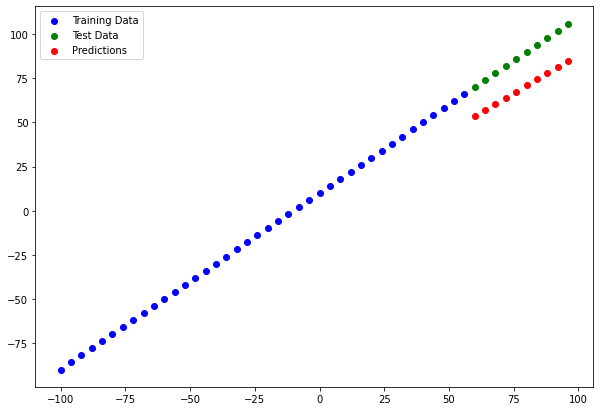

In [ ]:
# Make and plot for prediction 1

y_pred_1 = model_1.predict(X_test)
plot_pred(predictions=y_pred_1)

In [ ]:
mae_1 = mae(Y_test, y_pred_1)
mse_1 = mse(Y_test, y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
# Second Model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)

])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

In [ ]:
# Make and plot pred
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 47ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

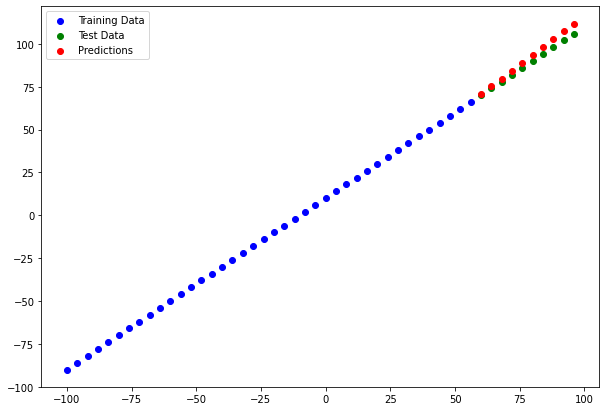

In [ ]:
plot_pred(predictions=y_pred_2)

In [ ]:
mae_2 = mae(X_test,y_pred_2)
mse_2 = mse(X_test, y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [ ]:
# Third Model
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)

])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_3.fit(X_train, Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/500
2/2 [=========================

In [ ]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 154ms/step


array([[15.854746],
       [16.617332],
       [17.379921],
       [18.142508],
       [18.905096],
       [19.667683],
       [20.430271],
       [21.192858],
       [21.955446],
       [22.718035]], dtype=float32)

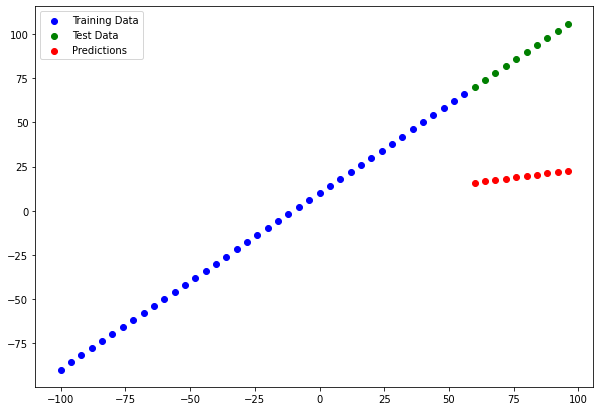

In [ ]:

# Plot
plot_pred(predictions=y_pred_3)

In [ ]:
mae_3 = mae(X_test,y_pred_3)
mse_3 = mse(X_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**Note**
+ You want to start with small experiment, then scale if necessary.



### Comparing and tracking the result of experiment

In [ ]:
### Let's compare model with pandas
import pandas as pd

model_result = [
    ["model_1",mae_1.numpy(),mse_1.numpy()],
    ["model_2",mae_2.numpy(),mse_2.numpy()],
    ["model_3",mae_3.numpy(),mse_3.numpy()]
]

all_result = pd.DataFrame(model_result, columns=['Model',"MAE","MSE"])
all_result

,Model,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [ ]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> One of the main goal should be to minimize the time needed to model a experiment.

### Tracking your experiment : 

+ One really good habit is to track result of your experiment
+ Doing so can be tidious if you are running lots of experments
+ Lickily, there are tools to help us 
+ One of the most famous is `TensorBoard` to help modelling experiment
+ `Weights and Biases` - tool used for tracking all kinds of machine learning model.

### Save a model 

+ Saving our model helps us to use our model outside the application(like web or app)

+ There are two main methods we can save our models to.
+ The SavedModel format
+ HDF5 model.

In [ ]:
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model  using HDF5 format
model_2.save("best_model_HDF5_Format.h5")

### Load a saved model

In [ ]:
new_model = tf.keras.models.load_model("best_model_SavedModel_format")
new_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_pred = model_2.predict(X_test)
loaded_model = new_model.predict(X_test)

1/1 [==============================] - 0s 73ms/step


In [ ]:
model_2_pred == loaded_model

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=Y_test,y_pred=model_2_pred) == mae(y_true=Y_test,y_pred=loaded_model) 

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load model of H5 format

h5_model = tf.keras.models.load_model("best_model_HDF5_Format.h5")


In [ ]:
model_2_pred = model_2.predict(X_test)
h5_model_pred = new_model.predict(X_test)

model_2_pred == h5_model_pred

1/1 [==============================] - 0s 30ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A large example : On more feature rich dataset